## Observations and Insights 

In [315]:
#Three Observations:
#1.	Because the standard deviation for tumor volume for the drug regimen Ketapril was the highest, it has the most variation in drug performance in its sample size. 
#2.	The distribution of gender among mice participants was about the same. 
#3.	Out of drug regimens Capomulin, Ramicane, Infubinol, and Ceftamin, Ceftamin has the most variation. 

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
together_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
together_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [18]:
together_data.loc[together_data.duplicated(['Mouse ID', "Timepoint"]), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [121]:
together_clean = together_data.loc[together_data['Mouse ID'] != 'g989', :]
together_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [20]:
# mouse_not_dup = mouse_group[mouse_group['Mouse ID'].isin(not_dups)]
# study_not_dup = study_not_dup.sort_values(by='Mouse ID', ascending=True)
# mouse_not_dup = mouse_not_dup.sort_values(by='Mouse ID', ascending=True)
# study_group = study_results.groupby("Mouse ID")


In [12]:
# Checking the number of mice.
many_mice = len(together_clean)
print(many_mice)

1880


In [78]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [6]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [149]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
together_group = together_clean.groupby("Drug Regimen")
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
group_mean = together_group["Tumor Volume (mm3)"].mean()
group_median = together_group["Tumor Volume (mm3)"].median()
group_variance = together_group["Tumor Volume (mm3)"].var()
group_standard = together_group["Tumor Volume (mm3)"].std()
group_sem = together_group["Tumor Volume (mm3)"].sem()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_data = pd.DataFrame({"Mean": group_mean, "Median":group_median, "Variance": group_variance, "Standard Deviation":group_standard, "SEM":group_sem})
summary_data.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [342]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_data_two = together_group.agg({'Tumor Volume (mm3)': ['mean', 'median','var', 'std', 'sem']})
summary_data_two
# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [173]:
#together_clean.groupby("Drug Regimen").count()['Mouse ID'].plot(kind = 'bar')

In [172]:
#together_clean['Drug Regimen'].value_counts().plot(kind = "bar")

## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Mice vs. Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Mice'>

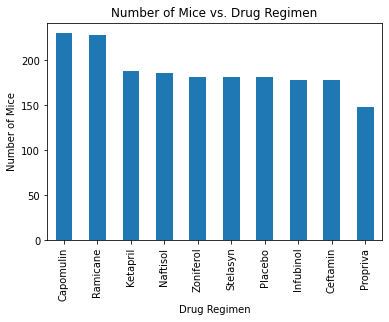

In [174]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
num_mice = together_clean["Drug Regimen"].value_counts()
x_axis = np.arange(len(num_mice))
panda_plot = num_mice.plot(kind='bar', title = 'Number of Mice vs. Drug Regimen')
panda_plot.set_xlabel("Drug Regimen")
panda_plot.set_ylabel("Number of Mice")
panda_plot


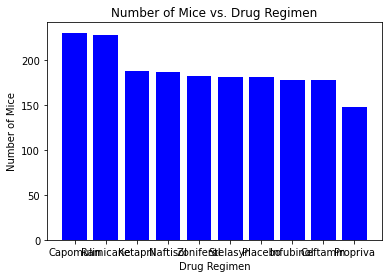

In [171]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
panda_bar = plt.bar(x_axis, num_mice, color='blue', alpha=1, align="center")
tick_locations = [value for value in x_axis]
py_bar = plt.xticks(tick_locations, list(num_mice.index.values))
py_bar = plt.title("Number of Mice vs. Drug Regimen")
py_bar = plt.xlabel("Drug Regimen")
py_bar = plt.ylabel("Number of Mice")


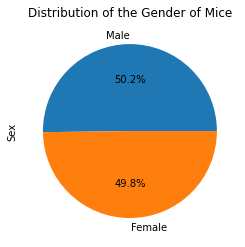

In [125]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = mouse_metadata["Sex"].value_counts()
panda_pie = gender_count.plot(kind='pie', title = 'Distribution of the Gender of Mice', autopct="%1.1f%%")



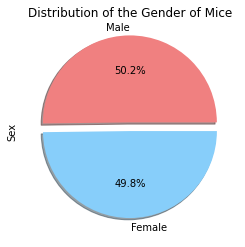

In [130]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]

# The values of each section of the pie chart
sizes = gender_count

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

py_pie = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=0)
py_pie = plt.title("Distribution of the Gender of Mice")
py_pie = plt.ylabel("Sex")


## Quartiles, Outliers and Boxplots

In [177]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
together_end_tumor = together_clean.drop_duplicates(subset=['Mouse ID'], keep='last')
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [239]:
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
mouse_capomulin = []
mouse_ramicane = []
mouse_infubinol = []
mouse_ceftamin = []

# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
for index, row in together_end_tumor.iterrows():
    if row["Drug Regimen"] == treatments[0]:
        mouse_capomulin.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == treatments[1]:
        mouse_ramicane.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == treatments[2]:
        mouse_infubinol.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == treatments[3]:
        mouse_ceftamin.append(row["Tumor Volume (mm3)"])
treatments_final_tumor = pd.DataFrame({"Capomulin":mouse_capomulin,"Ramicane":mouse_ramicane,"Infubinol":mouse_infubinol,"Ceftamin":mouse_ceftamin})
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles_ca = treatments_final_tumor["Capomulin"].quantile([.25,.5,.75])
lowerq_ca = quartiles_ca[0.25]
upperq_ca = quartiles_ca[0.75]
iqr_ca = upperq_ca-lowerq_ca
lower_bound_ca = lowerq_ca - (1.5*iqr_ca)
upper_bound_ca = upperq_ca + (1.5*iqr_ca)
outlier_ca = []
for point in mouse_capomulin:
    if point < lower_bound_ca or point > upper_bound_ca:
        outlier_ca.append(point)
if len(outlier_ca) == 0:
    print("There are no outliers for mice in who went through the capomulin drug regimen")
else:
    print("The outliers from the results from the capomulin drug regimen are as follows: " + str(outlier_ca))
          
quartiles_ra = treatments_final_tumor["Ramicane"].quantile([.25,.5,.75])
lowerq_ra = quartiles_ra[0.25]
upperq_ra = quartiles_ra[0.75]
iqr_ra = upperq_ra-lowerq_ra
lower_bound_ra = lowerq_ra - (1.5*iqr_ra)
upper_bound_ra = upperq_ra + (1.5*iqr_ra)
outlier_ra = []
for point in mouse_ramicane:
    if point < lower_bound_ra or point > upper_bound_ra:
        print(point)
        outlier_ra.append(point)
if len(outlier_ra) == 0:
    print("There are no outliers for mice in who went through the ramicane drug regimen")
else:
    print("The outliers from the results from the ramicane drug regimen are as follows: " + str(outlier_ra))

quartiles_in = treatments_final_tumor["Infubinol"].quantile([.25,.5,.75])
lowerq_in = quartiles_in[0.25]
upperq_in = quartiles_in[0.75]
lower_bound_in = lowerq_in - (1.5*iqr_in)
upper_bound_in = upperq_in + (1.5*iqr_in)
iqr_in = upperq_in-lowerq_in
outlier_in = []
for point in mouse_infubinol:
    if point < lower_bound_in or point > upper_bound_in:
        print(point)
        outlier_in.append(point)
if len(outlier_in) == 0:
    print("There are no outliers for mice in who went through the infubinol drug regimen")
else:
    print("The outliers from the results from the infubinol drug regimen are as follows: " + str(outlier_in))

quartiles_ce = treatments_final_tumor["Ceftamin"].quantile([.25,.5,.75])
lowerq_ce = quartiles_ce[0.25]
upperq_ce = quartiles_ce[0.75]
iqr_ce = upperq_ca-lowerq_ce
lower_bound_ce = lowerq_ce - (1.5*iqr_ce)
upper_bound_ce = upperq_ce + (1.5*iqr_ce)
outlier_ce = []
for point in mouse_ceftamin:
    if point < lower_bound_ce or point > upper_bound_ce:
        outlier_ce.append(point)
if len(outlier_ce) == 0:
    print("There are no outliers for mice in who went through the ceftamin drug regimen")
else:
    print("The outliers from the results from the ceftamin drug regimen are as follows: " + str(outlier_ce))
# Determine outliers using upper and lower bounds
    

There are no outliers for mice in who went through the capomulin drug regimen
There are no outliers for mice in who went through the ramicane drug regimen
36.321345799999996
The outliers from the results from the infubinol drug regimen are as follows: [36.321345799999996]
The outliers from the results from the ceftamin drug regimen are as follows: [62.99935619, 45.0, 56.05774909, 55.74282869, 48.72207785, 47.784681799999994, 61.84902336, 68.92318457, 67.74866174, 57.91838132, 46.78453491, 59.85195552, 64.29983003, 59.74190064, 61.43389223, 64.19234114, 45.0, 52.92534846, 45.0, 67.52748237, 45.0, 64.63494887, 61.38666032, 68.59474498, 64.72983655]


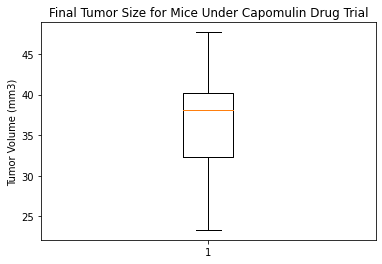

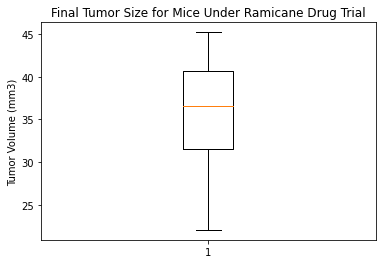

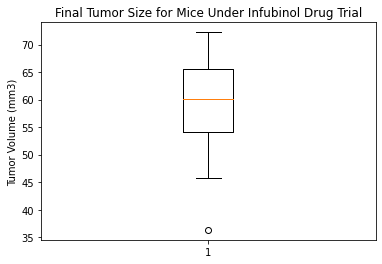

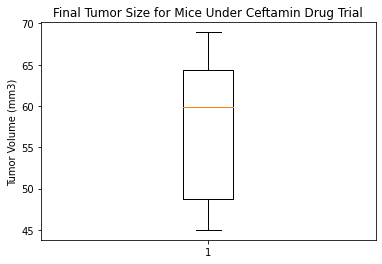

In [244]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
capomulin_data = treatments_final_tumor["Capomulin"]

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Size for Mice Under Capomulin Drug Trial")
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(capomulin_data)
plt.show()

ramicane_data = treatments_final_tumor["Ramicane"]

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Size for Mice Under Ramicane Drug Trial")
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(ramicane_data)
plt.show()

infubinol_data = treatments_final_tumor["Infubinol"]

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Size for Mice Under Infubinol Drug Trial")
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(infubinol_data)
plt.show()

ceftamin_data = treatments_final_tumor["Ceftamin"]
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Size for Mice Under Ceftamin Drug Trial")
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(ceftamin_data)
plt.show()

## Line and Scatter Plots

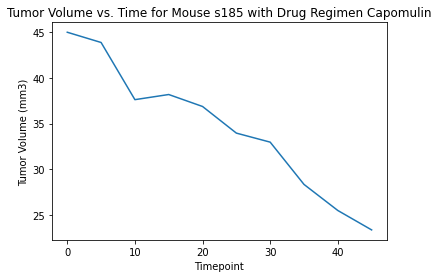

In [343]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
together_one_mouse = together_clean.groupby(["Drug Regimen", "Mouse ID"])
all_capomulin = together_clean[together_clean["Drug Regimen"] =='Capomulin']
all_oneid = all_capomulin[all_capomulin["Mouse ID"] =='s185']
plot_one = plt.plot(all_oneid["Timepoint"], all_oneid["Tumor Volume (mm3)"])
plt.title("Tumor Volume vs. Time for Mouse s185 with Drug Regimen Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

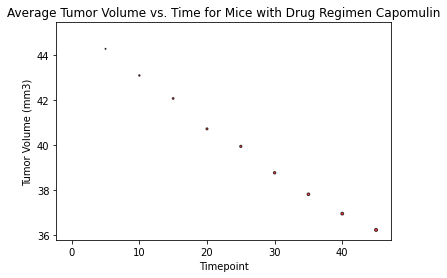

In [308]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
av_capomulin_group = all_capomulin.groupby(["Timepoint"])
av_capomulin = pd.DataFrame(av_capomulin_group["Tumor Volume (mm3)"].mean())
#timept = [0,5,10,15,20,25,30,35,40,45]
timept = list(av_capomulin.index.values) 
plt.scatter(timept, av_capomulin["Tumor Volume (mm3)"], marker="o", facecolors="red", edgecolors="black",s=x_axis, alpha=0.75)
plt.title("Average Tumor Volume vs. Time for Mice with Drug Regimen Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The r-squared is: 0.9034966277438606
The linear regression model is y = 0.89x + 22.76


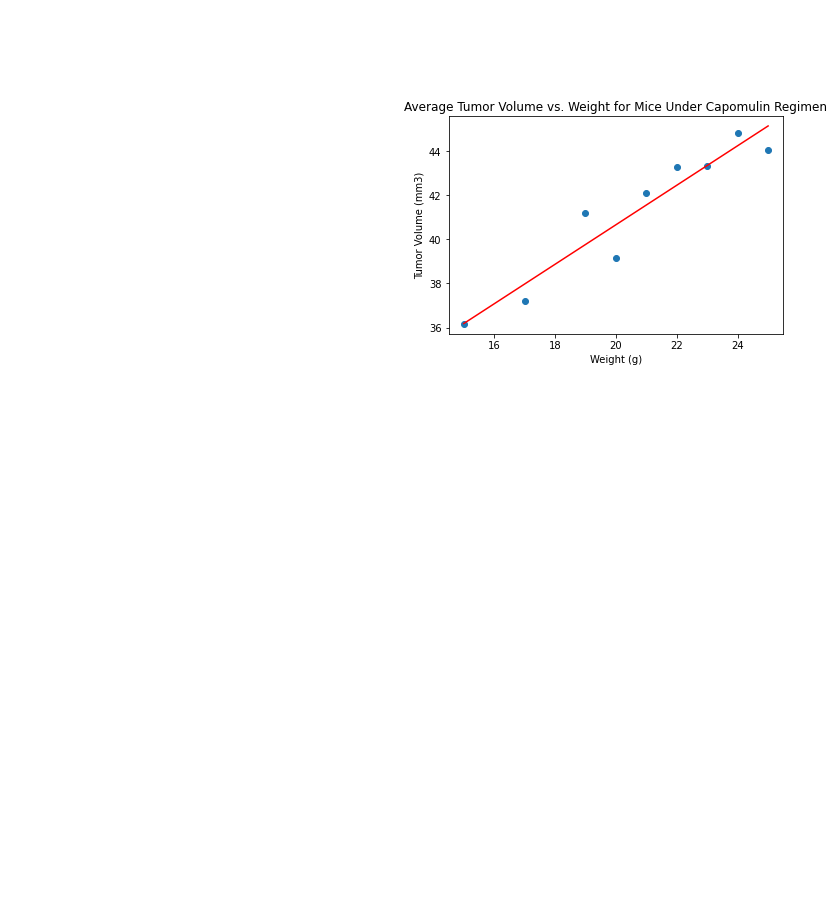

In [341]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cap_weight = all_capomulin.groupby(["Weight (g)"])
av_cap_weight = cap_weight['Tumor Volume (mm3)'].mean()
weight = list(av_cap_weight.index.values)
approx_tumor_new = []
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, av_cap_weight)
#regress_values = weight * slope + intercept
for w in weight:
    approx_tumor_new.append(w*slope + intercept)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, av_cap_weight)
plt.plot(weight,approx_tumor_new,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Average Tumor Volume vs. Weight for Mice Under Capomulin Regimen")
print(f"The r-squared is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print("The linear regression model is " + line_eq)
plt.show()